In [1]:
!pip install scikit-learn

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder


In [9]:
veri=pd.read_csv("train.csv")
veri

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [10]:
label_encoder=LabelEncoder().fit(veri.price_range)
labels=label_encoder.transform(veri.price_range)
classes=list(label_encoder.classes_)

In [11]:
x=veri.drop("price_range",axis=1)
y=labels

In [12]:
#verilerin standartlaştırılması
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
#Eğitim ve test ortamları hazırlanması
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [17]:
!pip install tensorflow


#Çıktı değerlerinin kategorileştirilmesi


  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-4.25.5-cp310-abi3-win_amd64.whl.metadata (541 bytes)
  Using cached wheel-0.44.0-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.6/385.2 MB 10.5 MB/s eta 0:00:37
   ---------------------------------------- 3.4/385.2 MB 10.1 MB/s eta 0:00:38
    --------------------------------------- 6.3/385.2 MB 11.0 MB/s eta 0:00:35
    --------------------------------------- 8.7/385.2 MB 11.2 MB/s eta 0:00:34
   - -------------------------------------- 11.3/385.2 MB 11.4 MB/s eta 0:00:33
   - -------------------------------------- 13.9/385.2 MB 11.3 MB/s eta 0:00:33
   - -------------------------------------- 16.3/385.2 MB 11.5 MB/s eta 0:00:33
   - --------------------

In [18]:
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model=Sequential()
model.add(Dense(16,input_dim=20,activation="relu"))
model.add(Dense(12,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()



c:\Users\azizd\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 16)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 4)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 592 (2.31 KB)

 Trainable params: 592 (2.31 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2627 - loss: 1.4417 - val_accuracy: 0.3000 - val_loss: 1.3668
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2838 - loss: 1.3477 - val_accuracy: 0.3750 - val_loss: 1.2931
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4125 - loss: 1.2582 - val_accuracy: 0.4575 - val_loss: 1.1863
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5143 - loss: 1.1288 - val_accuracy: 0.5375 - val_loss: 1.0528
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5556 - loss: 1.0050 - val_accuracy: 0.6050 - val_loss: 0.9145
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6081 - loss: 0.8656 - val_accuracy: 0.6650 - val_loss: 0.7960
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.7416 - val_accuracy: 0.7475 - val_loss: 0.6986
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7577 - loss: 0.6656 - val_accuracy: 0.7700 - val_loss:

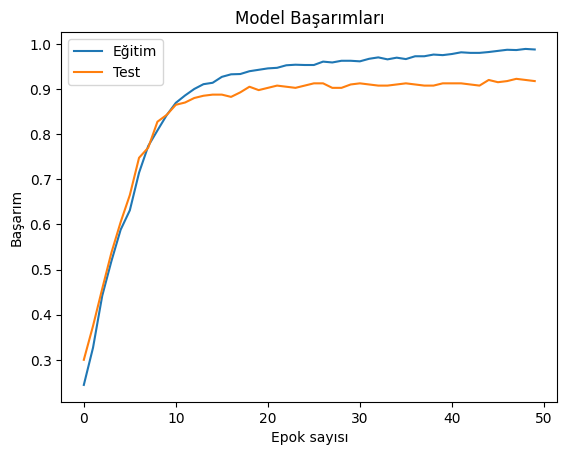

In [38]:
import matplotlib.pyplot as plt

plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Başarımları")
plt.ylabel("Başarım")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim","Test",],loc="upper left")
plt.show()



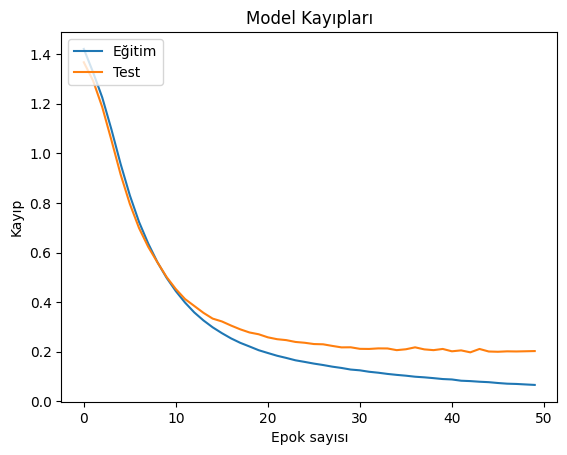

In [41]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Kayıpları")
plt.ylabel("Kayıp")
plt.xlabel("Epok sayısı")
plt.legend(["Eğitim","Test",],loc="upper left")
plt.show()